In [ ]:
# install essential library (if necessary)
!pip install --target=$my_path drjit
!pip install --target=$my_path mitsuba
!pip install --target=$my_path --force-reinstall numpy==1.26.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 104.5 MB/s eta 0:00:00
  Attempting uninstall: drjit
    Found existing installation: drjit 1.0.0
    Uninstalling drjit-1.0.0:
      Successfully uninstalled drjit-1.0.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 100.4 MB/s eta 0:00:00
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3070, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2863, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent c

In [1]:
# load gdrive library folder (optional)
import os, sys
from google.colab import drive
drive.mount('/gdrive')

my_path = '/content/notebooks'
env_path = '/gdrive/MyDrive/Colab Notebooks/pose_estimation_cwd/env'
if os.path.islink(my_path) == False:
  os.symlink(env_path, my_path)
sys.path.insert(0, my_path)

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


Render the silhouette of the initial scene

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
['textures', 'scenes', 'results', 'env']


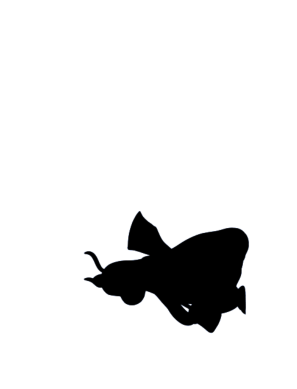

In [2]:
from google.colab import drive
drive.mount('/gdrive')

import os
os.chdir('/gdrive/MyDrive/Colab Notebooks/pose_estimation_cwd')
print(os.listdir('./'))

import math
import numpy as np
import pickle
import drjit as dr
import mitsuba as mi
import matplotlib.pyplot as plt
import cv2
from mitsuba.scalar_rgb import ScalarTransform4f as T

mi.set_variant('cuda_ad_rgb')

"""Specify mesh information in the below list.
   ex)
   mesh_info_list = [
   [('star', 3, [0.2, 0.0, 0.0], [0, 0, 45])],
   [('bunny-flatfoot', 1, [0.0, 0.0, 0.0], [0, 0, 0])]
   ]
   Render two objects, whose mesh file names are 'star.obj' and 'bunny-flatfoot.obj'.
   'star.obj' is 300% scaled up and 'bunny.obj' with 100% scale.
   Translate the 'star.obj' along the x-axis by 0.2(), rotate 45'degree along z-axis.
"""
mesh_info_list = [
    # Dataset
    #('statue',1.5,[0.3, 0, -0.15], [0, -90, 0]) # statue1
    #('statue',1.5,[0.25, 0, -0.55], [35, -90, 0]) # statue2
    #('statue',4,[0.65, 0., -0.2], [180, -90, 0]) # statue3
    #('statue',1.5,[0.25, 0, 0.2], [-35, -90, 0]) # statue4
    #('dragonite',2,[0.4, 0, -0.2], [20, -90, 180]) # dragonite1
    #('dragonite',2.2,[0.5, 0, -0.1], [105, -90, 180]) # dragonite2
    #('dragonite',2,[0.4, 0, -0.2], [-165, -90, 180]) # dragonite3
    #('dragonite',2.2,[0.45, 0, -0.2], [-80, -90, 180]) # dragonite4
    #('fox',2,[0.1, 0, -0.2], [165, 0, 90]) # fox1
    #('fox',2,[0.1, 0, -0.2], [-35, 0, 90]) # fox2
    #('fox',2,[0.1, 0, -0.2], [0, 0, 90]) # fox3
    #('fox',2,[0.1, 0, -0.2], [105, 0, 90]) # fox4

    # Dataset_old
    #('statue',1.5,[0.3, 0., -0.15], [0, -90, 0]) # statue1_old
    #('statue',1.5,[0.3, 0., -0.5], [30, -90, 0]) # statue2_old
    #('statue',3.5,[0.7, 0., -0.35], [180, -90, 0]) # statue3_old
    #('statue',1.6,[0.3, 0, 0.25], [-50, -90, 0]) # statue4_old
    #('fox',2,[0.1, 0, -0.2], [180, 0, 90]) # fox1_old
    #('fox',2,[-0.025, 0, -0.3], [-105, 0, 90]) #fox2_old
    #('fox',2,[0.1, 0, -0.2], [0, 0, 90]) # fox3_old
    #('fox',2,[0.1, 0, -0.2], [105, 0, 90]) #fox4_old
    #('dragonite',2,[0.4, 0, -0.2], [10, -90, 180]) # dragonite1_old
    #('dragonite',2.2,[0.5, 0, -0.1], [-205, -90, 180]) #dragonite2_old
    #('dragonite',2.2,[0.45, 0, -0.2], [-120, -90, 180]) #dragonite3_old
    #('dragonite',2.2,[0.45, 0, -0.2], [-50, -90, 180]) #dragonite4_old

    # Dataset_9x5
    #('square',3,[0.2, 0, 0.2], [0, -90, 180]) # square1_9x5
    #('square',3,[0.2, 0, 0.05], [50, -90, 180]) # square2_9x5
    #('square',3,[0.2, 0, -0.1], [90, -90, 180]) # square3_9x5
    #('fox',2,[0.1, 0, -0.2], [-165, 0, 90]) # fox1_9x5
    #('fox',2,[0.1, 0, -0.2], [-135, 0, 90]) # fox2_9x5
    #('fox',2,[0.1, 0, -0.2], [-20, 0, 90]) # fox3_9x5
    #('fox',2,[0.1, 0, -0.2], [45, 0, 90]) # fox4_9x5
    #('fox',2,[0.1, 0, -0.2], [125, 0, 90]) # fox5_9x5
    #('dragonite',2,[0.4, 0, -0.2], [0, -90, 180]) # dragonite1_9x5
    #('dragonite',2,[0.4, 0, -0.2], [90, -90, 180]) # dragonite2_9x5
    #('dragonite',2,[0.4, 0, -0.2], [165, -90, 180]) # dragonite3_9x5
    #('dragonite',2,[0.4, 0, -0.2], [-150, -90, 180]) # dragonite4_9x5
    #('dragonite',2,[0.4, 0, -0.2], [-85, -90, 180]) # dragonite5_9x5
    #('statue',1.5,[0.3, 0, -0.15], [0, -90, 0]) # statue1_9x5
    #('statue',1.5,[0.25, 0, -0.7], [45, -90, 0]) # statue2_9x5
    #('statue',1.5,[0.25, 1.0, -0.5], [140, -90, 0]) # statue3_9x5
    #('statue',1.5,[0.25, 1, 0.15], [-150, -90, 0]) # statue4_9x5
    #('statue',1.5,[0.25, 0.25, 0.3], [-55, -90, 0]) # statue5_9x5

    #('dragonite',2,[0.4, 0, -0.2], [0, -90, 180]) # dragonite1_6x3
    #('dragonite',2,[0.4, 0, -0.2], [45, -90, 180]) # dragonite2_6x3
    #('dragonite',2,[0.4, 0, -0.2], [110, -90, 180]) # dragonite3_6x3
    #('dragonite',2,[0.4, 0, -0.2], [-150, -90, 180]) # dragonite4_6x3
    #('dragonite',2,[0.4, 0, -0.2], [-85, -90, 180]) # dragonite5_6x3

    #('dragonite',2,[0.4, 0, -0.2], [0, -90, 180]) # dragonite1_12x6
    #('dragonite',2,[0.5, 0, -0.1], [90, -90, 180]) # dragonite2_12x6
    #('dragonite',2,[0.4, 0, -0.2], [130, -90, 180]) # dragonite3_12x6
    #('dragonite',2,[0.4, 0, -0.2], [195, -90, 180]) # dragonite4_12x6
    #('dragonite',2,[0.4, 0, -0.2], [-90, -90, 180]) # dragonite5_12x6
    #('fox',2,[0.1, 0, -0.2], [180, 0, 90]) # fox1_12x6
    #('fox',2,[0.1, 0, -0.2], [-130, 0, 90]) # fox2_12x6
    #('fox',2,[0.1, 0, -0.2], [-40, 0, 90]) # fox3_12x6
    #('fox',2,[0.1, 0, -0.2], [50, 0, 90]) # fox4_12x6
    #('fox',2,[0.1, 0, -0.2], [110, 0, 90]) # fox5_12x6
    #('lincoln',2,[0.05, 1.0, -0.1], [0, -90, 0]) # lincoln1_12x6
    #('lincoln',2,[0.05, 1.0, -0.1], [0, -90, -37]) # lincoln2_12x6
    #('lincoln',2,[0.07, 1.0, -0.1], [0, -90, -107]) # lincoln3_12x6
    #('owl',1.5,[0, 0, -0.1], [105, 0, 90]) # owl1_12x6
    #('owl',1.5,[0, 0, -0.1], [145, 0, 90]) # owl2_12x6
    #('owl',1.5,[0.05, 0, -0.1], [-150, 0, 90]) # owl3_12x6
    #('owl',1.5,[0.05, 0, -0.1], [-45, 0, 90]) # owl4_12x6
    #('owl',1.5,[0, 0.18, -0.1], [45, 0, 90]) # owl5_12x6

    #('dragonite',2,[0.4, 0, -0.3], [0, -90, 180]) # dragonite1_12x6 3000
    #('dragonite',2,[0.3, 0, -0.3], [-150, -90, 180]) # dragonite4_12x6 3000
    #('dragonite',2,[0.4, 0, -0.3], [-85, -90, 180]) # dragonite5_12x6 3000
    #('fox',2,[0.1, 0, -0.2], [-130, 0, 90]) # fox2_12x6 3000
    #('fox',2,[0.1, 0, -0.2], [145, 0, 90]) # fox4_12x6 3000
    #('fox',2,[0.1, 0, -0.2], [30, 0, 90]) # fox5_12x6 3000
    #('lincoln',2,[0.05, 1.0, -0.1], [0, -90, 0]) # lincoln1_12x6 3000
    #('lincoln',2,[0.05, 1.0, -0.15], [0, -90, -135]) # lincoln3_12x6 3000
    #('lincoln',2,[0.05, 1.0, -0.15], [0, -90, 160]) # lincoln4_12x6 3000
    #('lincoln',2,[0.05, 1.0, -0.15], [0, -90, 65]) # lincoln5_12x6 3000
    #('owl',1.5,[0, 0, -0.1], [145, 0, 90]) # owl1_12x6 3000
    #('owl',1.5,[0, 0, -0.1], [180, 0, 90]) # owl2_12x6 3000
    #('owl',1.5,[0, 0, -0.1], [-100, 0, 90]) # owl3_12x6 3000
    #('owl',1.5,[0, 0, -0.1], [-30, 0, 90]) # owl4_12x6 3000
    #('owl',1.5,[0, 0, -0.1], [60, 0, 90]) # owl5_12x6 3000
    #('square',3,[0.2, 0, 0.05], [50, -90, 180]) # square2_12x6 3000
    #('square',3,[0.2, 0.4, 0.05], [-50, -90, 180]) # square3_12x6 3000

    #('dragonite',2,[0.4, 0, -0.3], [0, -90, 180]) # dragonite1_12x6 3000
    #('dragonite',2,[0.3, 0, -0.3], [-150, -90, 180]) # dragonite4_12x6 3000
    #('dragonite',2,[0.4, 0, -0.3], [-85, -90, 180]) # dragonite5_12x6 3000
    #('dragonite',2,[-0.4, 0, -0.3], [0, 90, 50]) # dragonite15_12x6 3000
    #('dragonite',2,[-0.4, 0, 0], [0, 90, -45]) # dragonite17_12x6 3000
    #('dragonite',2,[-0.4, 0, 0], [0, 90, -125]) # dragonite18_12x6 3000
    #('dragonite',2,[-0.4, 0, 0], [0, 90, -140]) # dragonite19_12x6 3000.
    #('square',3,[0.2, 0, 0.05], [50, -90, 180]) # square2_12x6 3000
    #('square',3,[0.2, 0.4, 0.05], [-50, -90, 180]) # square3_12x6 3000
    # ('square',3,[-0.2, 0.3, -0.5], [25, 90, 180]) # square11_12x6 3000
    # ('square',3,[-0.2, 0.3, -0.5], [-45, 90, 180]) # square12_12x6 3000
    #('fox',2,[0.1, 0, -0.2], [-130, 0, 90]) # fox2_12x6 3000
    #('fox',2,[0.1, 0, -0.2], [145, 0, 90]) # fox4_12x6 3000
    #('fox',2,[0.1, 0, -0.2], [30, 0, 90]) # fox5_12x6 3000
    #('fox',2,[-0.1, 0, -0.2], [-45, 0, -90]) # fox11_12x6 3000
    #('fox',2,[-0.1, 0, -0.2], [-80, 0, -90]) # fox14_12x6 3000
    #('fox',2,[-0.1, 0, -0.2], [-125, 0, -90]) # fox15_12x6 3000
    # ('fox',2,[-0.1, 0, -0.2], [165, 0, -90]) # fox16_12x6 3000
    # ('fox',2,[-0.1, 0, -0.2], [130, 0, -90]) # fox17_12x6 3000
    # ('fox',2,[-0.1, 0, -0.2], [70, 0, -90]) # fox18_12x6 3000

    #('dragonite',1.5,[-0.4, 0, -0.3], [0, 90, 50]) # dragonite4_12x6 3000
    #('dragonite',1.5,[-0.4, 0, 0], [0, 90, 0]) # dragonite5_12x6 3000
    #('dragonite',1.5,[-0.4, 0, 0], [0, 90, -70]) # dragonite6_12x6 3000
    #('dragonite',1.5,[-0.4, 0, 0], [0, 90, -110]) # dragonite7_12x6 3000
    #('dragonite',1.5,[-0.4, 0, 0], [0, 90, -140]) # dragonite8_12x6 3000
    #('fox',1.5,[-0.1, 0, -0.2], [20, 0, -90]) # fox1_12x6 3000
    #('fox',1.5,[-0.1, 0, -0.2], [-30, 0, -65]) # fox2_12x6 3000
    #('fox',1.5,[-0.1, 0, -0.2], [-60, 0, -75]) # fox3_12x6 3000
    #('fox',1.5,[-0.1, 0, -0.2], [-140, -15, -75]) # fox4_12x6 3000
    #('fox',1.5,[-0.1, 0, -0.2], [-170, -15, -90]) # fox5_12x6 3000
    #('fox',1.5,[-0.1, 0, -0.2], [140, 0, -110]) # fox6_12x6 3000
    #('fox',1.5,[-0.1, 0, -0.2], [110, 0, -110]) # fox7_12x6 3000

    ('dragonite',1.5,[-0.4, 0, -0.3], [0, 90, 50]) # dragonite3_12x6 (ㅁ3)
    #('dragonite',1.5,[-0.4, 0, 0], [0, 90, 0])
]

hparams = {
    'captured_img_name': 'dragonite_mask3',     # Reference image file name without filename extension.
    'mesh_info_list': mesh_info_list,
    'learning_rate': 0.04,
    'endurance': 100,                    # Used for learning rate decay. If there is no improvement for the specified iteration, reduce the learning rate by 10%.
    'iteration_count': 200 + 1,
    'spp': 16,                           # sample per pixel used for rendering in the pose estimation process.
}

nobject = len(mesh_info_list)   # number of the objects in the captured image.

if not os.path.exists('./results/'+hparams['captured_img_name']):
    os.makedirs('./results/'+hparams['captured_img_name'])

integrator = {
    'type': 'direct_projective',  # For the inverse rendering, direct_reparam is used.
}

mitsuba_dict = {
    'type': 'scene',
    'integrator': integrator,
    'sensor':  {
        'type': 'perspective',
        'to_world': T.look_at(
                        origin=(0.0, 2, 0),
                        target=(0.0, 0, 0),
                        up=(0, 0, 1)
                    ),
        'fov': 30,
        'film': {
            'type': 'hdrfilm',
            'width': 456,
            'height': 608,
            'rfilter': { 'type': 'gaussian' },
            'sample_border': True
        },
    },
    'background': {
        'type': 'obj',
        'filename': 'scenes/meshes/rectangle.obj',
        'to_world': T.translate([0.0, -10.0, 0.0]).scale(20.0).rotate([1, 0, 0], -90),
        'face_normals': True,
        'material': {
            'type': 'twosided',
            'bsdf': {
                'type': 'diffuse',
                'reflectance': { 'type': 'rgb', 'value': [1., 1., 1.] },
            },
        },
    },
        'emitter': {
            'type': 'envmap',
            'filename': "textures/envmap.hdr",
            'scale': 3,
        },
}

objname = 'object'+hparams['captured_img_name']
for idx, (mesh_name, scale, translation, rotations) in enumerate(hparams['mesh_info_list']):
    mitsuba_dict[objname] =\
        {
            'type': 'obj',
            'filename': 'scenes/meshes/'+mesh_name+'.obj',   # Specify the directory of the 3d mesh file.
            'to_world': T.translate(translation).scale(0.004*scale).rotate([1, 0, 0], rotations[0]).rotate([0, 1, 0], rotations[1]).rotate([0, 0, 1], rotations[2]),
            'material': {
                'type': 'twosided',
                'bsdf': {
                    'type': 'diffuse',
                    'reflectance': { 'type': 'rgb', 'value': [0., 0., 0.] },
                },
            },
        }

scene = mi.load_dict(mitsuba_dict)
init_img = mi.render(scene, seed=0, spp=256)
init_img = dr.clamp(init_img, 0, 1)

plt.axis('off')
plt.imshow(init_img)

Read the reference image and get the alpha mask and remoce alpha channel

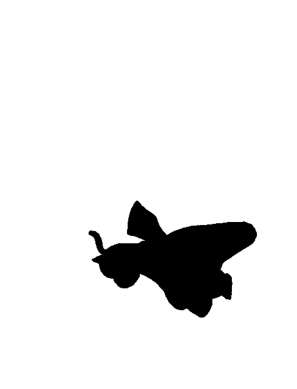

In [3]:
img_ref = plt.imread("scenes/reference_images/background_removed_test/"+hparams['captured_img_name']+'.png')

# --- Silhouette Rendering ---
img_ref = np.array(img_ref, dtype=np.float32)
s_img_ref = np.array(img_ref, dtype=np.float32)

# --- get the alpha channel mask of the object and background ---
alpha_mask_background = img_ref[:,:,3]==0
alpha_mask_object = img_ref[:,:,3] != 0

"""
silhouette of the reference image, alpha==0 means background.
alpha == 1 means object. 0 < alpha < 1 means blurred boundary between object and b
"""
s_img_ref[img_ref[:,:,3]==0.0] = 1.
s_img_ref[img_ref[:,:,3]!=0.0] = 0.

# --- make backgroudn of the reference image to be white ---
img_ref[img_ref[:,:,3]==0.0] = 1.0

# --- Remove alpha channel if exists ---
if len(img_ref[0][0]) == 4:
    img_ref = img_ref[:, :, :3]
    s_img_ref = s_img_ref[:, :, :3]
plt.axis('off')
plt.imshow(s_img_ref)

objectdragonite_mask3_angle0 :  [0.0]
objectdragonite_mask3_angle1 :  [0.0]
objectdragonite_mask3_angle2 :  [0.0]
objectdragonite_mask3_trans :  [[0.0, 0.0, 0.0]]


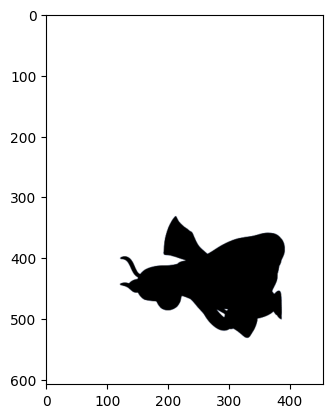

In [4]:
opt = mi.ad.Adam(lr=hparams['learning_rate'])

opt[objname+'_angle0'] = mi.Float(0.0)
opt[objname+'_angle1'] = mi.Float(0.0)
opt[objname+'_angle2'] = mi.Float(0.0)
opt[objname+'_trans'] = mi.Point3f(0.0, 0.0, 0.0)

params = mi.traverse(scene)
object_vertex_position_list = list()

object_vertex_position_list.append(dr.unravel(mi.Point3f, params[objname+'.vertex_positions']))

def apply_transformation(params, opt):

    # --- clamp parameters ---
    opt[objname+'_angle0'] = dr.clamp(opt[objname+'_angle0'], -1.8, 1.8)
    opt[objname+'_angle1'] = dr.clamp(opt[objname+'_angle1'], -1.8, 1.8)
    opt[objname+'_angle2'] = dr.clamp(opt[objname+'_angle2'], -1.8, 1.8)

    #  --- make transformations applied for mesh object ---
    trafo = mi.Transform4f.translate([opt[objname+'_trans'].x, opt[objname+'_trans'].y, opt[objname+'_trans'].z])\
        .rotate([0, 0, 1], opt[objname+'_angle2']*100.0).rotate([0, 1, 0], opt[objname+'_angle1']*100.0).rotate([1, 0, 0], opt[objname+'_angle0']*100.0)

    # --- apply the transform to the object ---
    params[objname+'.vertex_positions'] = dr.ravel(trafo @ object_vertex_position_list[0])

    params.update(opt)

apply_transformation(params, opt)

img_init = mi.render(scene, seed=0, spp=256)
img_init = dr.clamp(img_init, 0, 1)

plt.imshow(img_init)
for key, val in opt.items():
        print(key, ": ", val)

Iteration 00: lr=0.04 error=0.050761785358190536
Iteration 01: lr=0.04 error=0.028571633622050285
Iteration 02: lr=0.04 error=0.032781630754470825
Iteration 03: lr=0.04 error=0.028956253081560135
Iteration 04: lr=0.04 error=0.015108025632798672
Iteration 05: lr=0.04 error=0.020572606474161148
Iteration 06: lr=0.04 error=0.023708738386631012
Iteration 07: lr=0.04 error=0.01977834291756153
Iteration 08: lr=0.04 error=0.013796131126582623
Iteration 09: lr=0.04 error=0.01567312516272068
Iteration 10: lr=0.04 error=0.01757478341460228
Iteration 11: lr=0.04 error=0.0133185014128685
Iteration 12: lr=0.04 error=0.0048433942720294
Iteration 13: lr=0.04 error=0.012616263702511787
Iteration 14: lr=0.04 error=0.014580890536308289
Iteration 15: lr=0.04 error=0.013008289970457554
Iteration 16: lr=0.04 error=0.007687374018132687
Iteration 17: lr=0.04 error=0.011085600592195988
Iteration 18: lr=0.04 error=0.011213129386305809
Iteration 19: lr=0.04 error=0.007335292641073465
Iteration 20: lr=0.04 error

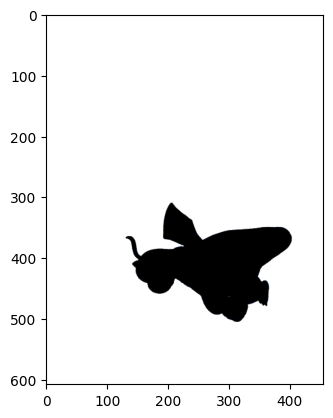

In [8]:
iteration_count = hparams['iteration_count']
spp = hparams['spp']
save_iter = (iteration_count)//6

loss_hist = list()
save_img_list = list()
min_loss = 100000000
min_loss_iter = -1
optimal_img = None # when loss is the minimum
lr = hparams['learning_rate']
endurance = hparams['endurance']

for iter in range(iteration_count):
    # Apply the mesh transformation
    apply_transformation(params, opt)
    # Perform a differentiable rendering
    s_img = mi.render(scene, params, seed=iter, spp=spp)
    # Clamp the image pixel values
    s_img = dr.clamp(s_img, 0, 1)

    # Save img
    if (iter+1)%save_iter == 0:
        save_img_list.append(s_img)
    # Evaluate the objective function
    loss = dr.sum(dr.sqr(s_img - s_img_ref)) / len(s_img)

    # Record image of the minimum loss
    if loss[0] < min_loss:
        optimal_img = s_img
        min_loss = loss[0]
        min_loss_iter = iter
        endurance = hparams['endurance']

    # Backpropagate through the rendering process
    dr.backward(loss)

    # Optimizer: take a gradient descent step
    opt.step()
    loss_hist.append(loss)
    print(f"Iteration {iter:02d}: lr={lr} error={loss[0]}")

    # Implement the learning rate decay (scheduler)
    if iter>=min_loss_iter+endurance:
        lr *= 0.1
        opt.set_learning_rate(lr)
        endurance+=hparams['endurance']

#optimal_img = np.array(optimal_img) : Kernel Crash를 유발함 (필요X)
plt.imshow((optimal_img))
print(f"Iteration {iter:02d}: lr={lr} error={loss[0]}, loss denomiator={len(s_img)}")
print("optimal loss: ", min_loss, "min loss iter: ", min_loss_iter)
for key, val in opt.items():
        print(key, ": ", val)

# save optimization results
optvalue = np.array([opt[objname+'_angle0'],opt[objname+'_angle1'],opt[objname+'_angle2'],
                     opt[objname+'_trans'][0],opt[objname+'_trans'][1],opt[objname+'_trans'][2],
                     mi.Float(min_loss),mi.Float(min_loss_iter)])

np.save('./results/'+hparams['captured_img_name']+"/optimization_loss_hiss.npy", loss_hist)
np.save('./results/'+hparams['captured_img_name']+"/optimization_save_img_list.npy", np.array(save_img_list))
np.save('./results/'+hparams['captured_img_name']+"/optimization_optimal_img.npy", optimal_img)
np.save('./results/'+hparams['captured_img_name']+"/optimization_opt_values.npy", optvalue)

# minimal loss가 0.03 이상이면 Optimization 재시도함

In [5]:
# Load optimization results (if necessary)
iteration_count = hparams['iteration_count']
spp = hparams['spp']
save_iter = iteration_count//6

loss_hist = np.load('./results/'+hparams['captured_img_name']+"/optimization_loss_hiss.npy")
save_img_list = np.load('./results/'+hparams['captured_img_name']+"/optimization_save_img_list.npy")
optimal_img= np.load('./results/'+hparams['captured_img_name']+"/optimization_optimal_img.npy")
optvalue = np.load('./results/'+hparams['captured_img_name']+"/optimization_opt_values.npy")

opt[objname+'_angle0'] = mi.Float(optvalue[0])
opt[objname+'_angle1'] = mi.Float(optvalue[1])
opt[objname+'_angle2'] = mi.Float(optvalue[2])
opt[objname+'_trans'] = mi.Point3f(optvalue[3], optvalue[4], optvalue[5])
min_loss = optvalue[6]
min_loss_iter = int(optvalue[7])

apply_transformation(params, opt)

print("optimal loss: ", min_loss, "min loss iter: ", min_loss_iter)
for key, val in opt.items():
        print(key, ": ", val)

optimal loss:  [0.00367929] min loss iter:  92
objectdragonite_mask3_angle0 :  [-0.012866373173892498]
objectdragonite_mask3_angle1 :  [-0.0779421404004097]
objectdragonite_mask3_angle2 :  [0.23383377492427826]
objectdragonite_mask3_trans :  [[-0.020641706883907318, -0.07512897998094559, 0.03997299447655678]]


<ipython-input-5-1ada2d257dee>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  min_loss_iter = int(optvalue[7])


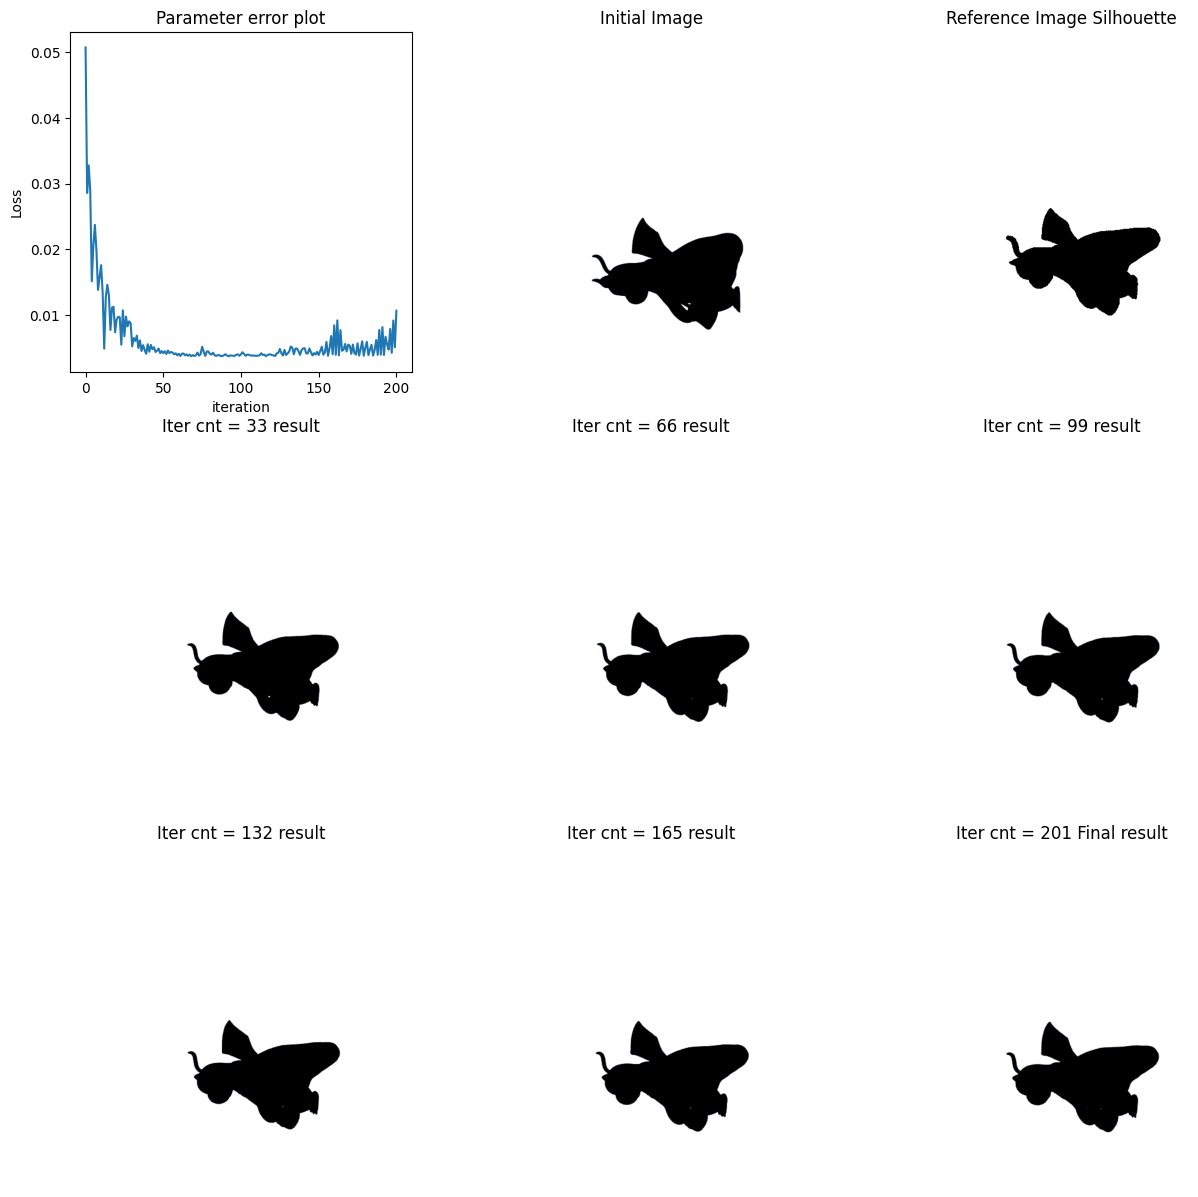

In [6]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

axs[0][0].plot(loss_hist)
axs[0][0].set_xlabel('iteration');
axs[0][0].set_ylabel('Loss');
axs[0][0].set_title('Parameter error plot');

axs[0][1].imshow(img_init)
axs[0][1].axis('off')
axs[0][1].set_title('Initial Image')

axs[0][2].imshow(s_img_ref)
axs[0][2].axis('off')
axs[0][2].set_title('Reference Image Silhouette')

axs[1][0].imshow(save_img_list[0])
axs[1][0].axis('off')
axs[1][0].set_title('Iter cnt = {} result'.format(save_iter))

axs[1][1].imshow(save_img_list[1])
axs[1][1].axis('off')
axs[1][1].set_title('Iter cnt = {} result'.format(save_iter*2))

axs[1][2].imshow(save_img_list[2])
axs[1][2].axis('off')
axs[1][2].set_title('Iter cnt = {} result'.format(save_iter*3))

axs[2][0].imshow(save_img_list[3])
axs[2][0].axis('off')
axs[2][0].set_title('Iter cnt = {} result'.format(save_iter*4))

axs[2][1].imshow(save_img_list[4])
axs[2][1].axis('off')
axs[2][1].set_title('Iter cnt = {} result'.format(save_iter*5))

axs[2][2].imshow((mi.render(scene, spp=spp)))
axs[2][2].axis('off')
axs[2][2].set_title('Iter cnt = {} Final result'.format(iteration_count))

plt.show()


Scene File: ./results/dragonite_mask3/scene.xml
Scene Folder: ./results/dragonite_mask3
Wrote scene files.
 ./results/dragonite_mask3/scene.xml


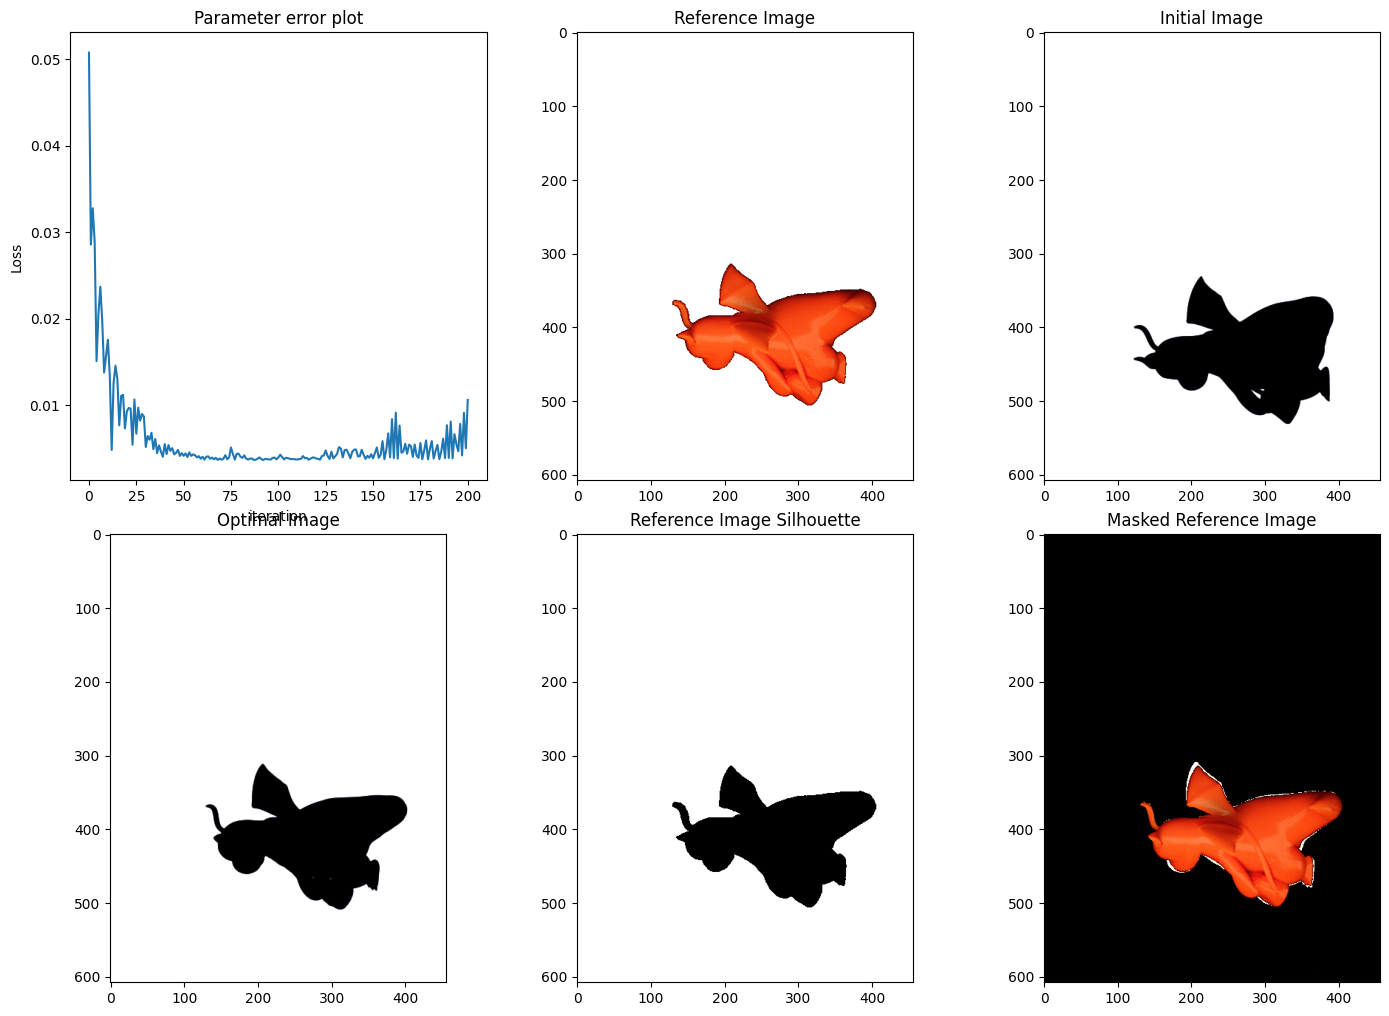

In [7]:
#Use final result as mask

reversed_optimal_img = np.array(optimal_img)
reversed_optimal_img = reversed_optimal_img!=1.0
reversed_optimal_img = np.array(reversed_optimal_img, dtype=np.float32)

fig, axs = plt.subplots(2, 3, figsize=(15, 10) )

axs[0][0].plot(loss_hist)
#axs[0][0].set_aspect('equal')
axs[0][0].set_xlabel('iteration')
axs[0][0].set_ylabel('Loss')
axs[0][0].set_title('Parameter error plot')

axs[1][0].imshow(mi.render(scene, spp=256))
axs[1][0].set_aspect('equal')
axs[1][0].set_title('Optimal Image')

axs[0][1].imshow(img_ref)
axs[0][1].set_aspect('equal')
axs[0][1].set_title('Reference Image')

axs[1][1].imshow(s_img_ref)
axs[1][1].set_aspect('equal')
axs[1][1].set_title('Reference Image Silhouette')

axs[0][2].imshow(img_init)
axs[0][2].set_aspect('equal')
axs[0][2].set_title('Initial Image')

axs[1][2].imshow(reversed_optimal_img*img_ref)
axs[1][2].set_aspect('equal')
axs[1][2].set_title('Masked Reference Image')

plt.subplots_adjust(left = 0.05, bottom = 0.0, right = 0.95, top = 0.95, hspace = 0.12, wspace = 0.12)
plt.savefig('./results/'+hparams['captured_img_name']+'/result.png', pad_inches = 0.1)

# To save and load the scene, we cannot use the following integrator type: 'direct_reparam'
mitsuba_dict['integrator']['type'] = 'path'
mi.xml.dict_to_xml(scene_dict=mitsuba_dict, filename='./results/'+hparams['captured_img_name']+'/scene.xml')
save_opt_dict = dict()
save_opt_dict['nobject'] = nobject
for key, val in opt.items():
    save_opt_dict[key] = (np.array(val, dtype=np.float64))
with open('./results/'+hparams['captured_img_name']+'/saved_pose.pkl', 'wb') as f:
    pickle.dump(save_opt_dict, f)


Extract the depth map

before rearange, img[300][300]:  12.033557


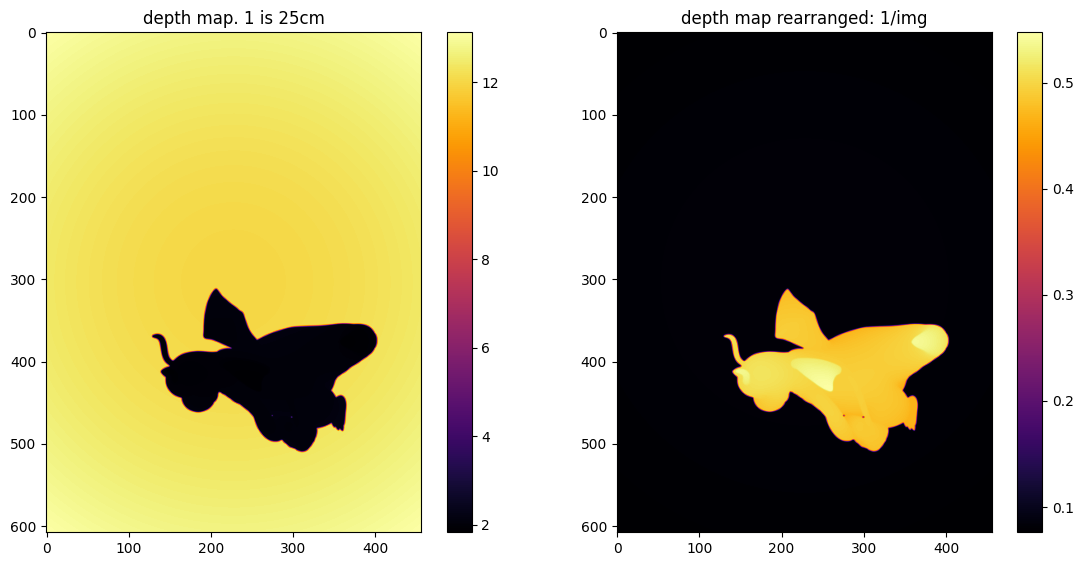

In [8]:
mitsuba_dict['integrator']['type'] = 'depth'
scene = mi.load_dict(mitsuba_dict)
params = mi.traverse(scene)
apply_transformation(params, opt)
img = mi.render(scene, seed=0, spp=1024)
img = np.array(img)
img = img[:,:,0]
np.save('./results/'+hparams['captured_img_name']+'/depth_raw.npy', img)
np.save('./results/'+hparams['captured_img_name']+'/depth_rearanged.npy', 1/img)
background_indices = img >= 11.98 # The value '11.98' is the depth map pixel value of the middle of the background( i.e. img[127][127] ).
object_indices = img < 11.98
print("before rearange, img[300][300]: ",img[300][300])

fig, axs = plt.subplots(1,2, figsize=(12, 5) )
im1 = axs[0].imshow(img, cmap='inferno')
fig.colorbar(im1, ax=axs[0])
axs[0].set_title('depth map. 1 is 25cm')


im2 = axs[1].imshow(1/img, cmap='inferno')
fig.colorbar(im2, ax=axs[1])
axs[1].set_title('depth map rearranged: 1/img')
plt.subplots_adjust(left = 0.05, bottom = 0.0, right = 0.95, top = 1., hspace = 0., wspace = 0.12)
plt.savefig('./results/'+hparams['captured_img_name']+'/depthes.png')


Extract the normal map and Save normal map in the .npy format(numpy array).

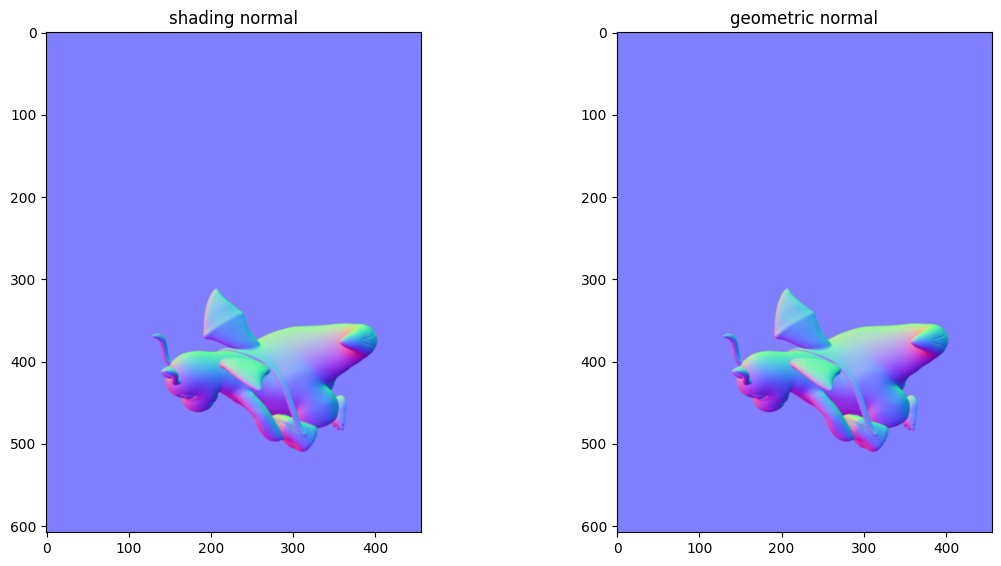

In [9]:
integrator = {
    'type': 'aov',
    'aovs': 'gn:geo_normal,sn:sh_normal',
    'my_image': {
        'type': 'path',
    }
}
mitsuba_dict['integrator'] = integrator

scene = mi.load_dict(mitsuba_dict)
params = mi.traverse(scene)
apply_transformation(params, opt)
img = mi.render(scene, seed=0, spp=1024)
img = np.array(img)

fig, axs = plt.subplots(1,2, figsize=(12, 5) )

# Change the order of r-channel and g-channel
shading_normal_img = np.array(img[:,:,6:9])
temp = np.array(shading_normal_img[:, :, 2])
shading_normal_img[:, :, 2] = shading_normal_img[:, :, 1]
shading_normal_img[:, :, 1] = temp[:,:]
shading_normal_img = (shading_normal_img+1)/2  # normal map encoding
axs[0].imshow(shading_normal_img)
axs[0].set_title('shading normal')

# Change the order of r-channel and g-channel
geo_normal_img = np.array(img[:, :, 3:6])
temp = np.array(geo_normal_img[:, :, 2])
geo_normal_img[:, :, 2] = geo_normal_img[:, :, 1]
geo_normal_img[:, :, 1] = temp[:,:]
geo_normal_img = (geo_normal_img+1)/2
axs[1].imshow(geo_normal_img)
axs[1].set_title('geometric normal')
plt.subplots_adjust(left = 0.05, bottom = 0.0, right = 0.95, top = 1., hspace = 0., wspace = 0.12)

plt.savefig('./results/'+hparams['captured_img_name']+'/normals.png')

np.save('./results/'+hparams['captured_img_name']+"/shading_normal_img.npy", shading_normal_img)
np.save('./results/'+hparams['captured_img_name']+"/geo_normal_img.npy", geo_normal_img)

Save normal map Generate normal map mask.

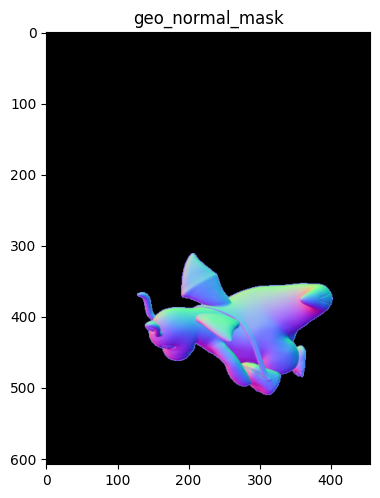

In [10]:
geo_normal_img_mask = np.array(geo_normal_img)
geo_normal_img_mask[background_indices]=0
np.save('./results/'+hparams['captured_img_name']+"/geo_normal_img_mask.npy", geo_normal_img_mask)
plt.title("geo_normal_mask")
plt.subplots_adjust(left = 0.0, bottom = 0.05, right = 1.0, top = 0.95, hspace = 0., wspace = 0.)
plt.imshow(geo_normal_img_mask)
plt.savefig('./results/'+hparams['captured_img_name']+'/geo_normal_mask.png')

Alpha blending with reference image and rendered normal image

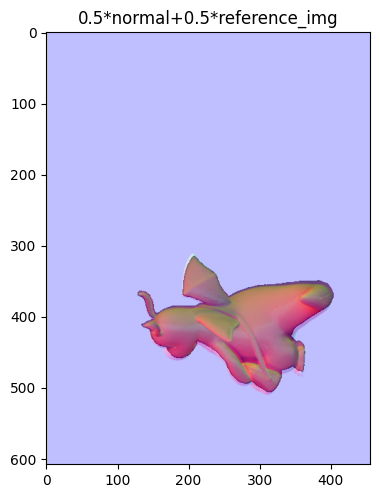

In [11]:
blended = geo_normal_img * 0.5 + img_ref * 0.5
plt.title("0.5*normal+0.5*reference_img")
plt.subplots_adjust(left = 0.0, bottom = 0.05, right = 1.0, top = 0.95, hspace = 0., wspace = 0.)
plt.imshow(blended)
plt.savefig('./results/'+hparams['captured_img_name']+'/blended.png')

Load the saved scene and pose, render. Blend reference image and rendered image to show the pose alignment.

In [ ]:
import os
import pickle
import drjit as dr
import mitsuba as mi
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from mitsuba.scalar_rgb import ScalarTransform4f as T

### ----------------  Preprocessor ----------------  ###
captured_img_name = '001'
mi.set_variant('cuda_ad_rgb')
object_color = mi.Point3f(0.4, 0.0, 0.0)

def apply_transformation(params, opt):

    # --- clamp parameters ---
    opt[objname+'_angle0'] = dr.clamp(opt[objname+'_angle0'], -1.8, 1.8)
    opt[objname+'_angle1'] = dr.clamp(opt[objname+'_angle1'], -1.8, 1.8)
    opt[objname+'_angle2'] = dr.clamp(opt[objname+'_angle2'], -1.8, 1.8)

    #  --- make transformations applied for mesh object ---
    trafo = mi.Transform4f.translate([opt[objname+'_trans'].x, opt[objname+'_trans'].y, opt[objname+'_trans'].z])\
        .rotate([0, 0, 1], opt[objname+'_angle2']*100.0).rotate([0, 1, 0], opt[objname+'_angle1']*100.0).rotate([1, 0, 0], opt[objname+'_angle0']*100.0)

    # --- apply the transform to the object ---
    params[objname+'.vertex_positions'] = dr.ravel(trafo @ object_vertex_position_list[0])

    params.update(opt)

### ----------------  scene loading part ----------------  ###
scene = mi.load_file(path='./results/'+captured_img_name+'/scene.xml')
params = mi.traverse(scene)
with open('./results/'+captured_img_name+'/saved_pose.pkl', 'rb') as f:
    save_opt_dict = pickle.load(f)
nobject = save_opt_dict['nobject'] if 'nobject' in save_opt_dict else 1
object_vertex_position_list = list()

object_vertex_position_list.append(dr.unravel(mi.Point3f, params[objname+'.vertex_positions']))

opt = mi.ad.Adam(lr=0.04)
opt[objname+'_angle0'] = mi.Float(0.0)
opt[objname+'_angle1'] = mi.Float(0.0)
opt[objname+'_angle2'] = mi.Float(0.0)
opt[objname+'_trans'] = mi.Point3f(0.0, 0.0, 0.0)
params[objname+'.bsdf.brdf_0.reflectance.value'] = object_color

params['background.bsdf.brdf_0.reflectance.value'] = mi.Point3f(.0, .0, .0)

for key, val in save_opt_dict.items():
    if key == 'nobject':
        continue
    if type(val[0]) == np.float64:
        opt[key] = mi.Float(val)
    else:
        opt[key] = mi.Point3f(val[0][0], val[0][1], val[0][2])
apply_transformation(params, opt)

rendered_img = np.array(mi.render(scene, spp=512))
img_ref = plt.imread("scenes/reference_images/clean_img/"+captured_img_name+'.png')[:, :, :3]
img_ref_with_alpha = plt.imread("scenes/reference_images/background_removed_12x6/"+captured_img_name+'.png')

img_ref[img_ref_with_alpha[:,:,3]==0] = 0.

fig, axs = plt.subplots(1,3, figsize=(15, 10) )
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['font.size'] = 12
axs[0].imshow(rendered_img)
axs[0].set_title('Rendering with optimized Pose', y=-0.08)
axs[1].imshow(img_ref)
axs[1].set_title('Reference Image (Mask)', y=-0.08)
axs[2].imshow(rendered_img*0.5 + img_ref*0.5)
axs[2].set_title('Blended Image (0.5 × rendering + 0.5 × reference)', y=-0.08)
for i in range(len(axs)):
    axs[i].spines['top'].set_color('black')
    axs[i].spines['right'].set_color('black')
    axs[i].spines['bottom'].set_color('black')
    axs[i].spines['left'].set_color('black')
    axs[i].tick_params(axis='both', colors='black')
    axs[i].tick_params(axis='both', which='both', length=0, labelbottom=False, labelleft=False, labelright=False, labeltop=False)

plt.imsave('./results/'+captured_img_name+'/render.png', np.clip(rendered_img, 0, 1))
plt.imsave('./results/'+captured_img_name+'/ref.png', np.clip(img_ref, 0, 1))
plt.imsave('./results/'+captured_img_name+'/blended.png', np.clip(rendered_img*0.5 + img_ref*0.5, 0, 1))
fig.tight_layout()
plt.savefig('./results/'+captured_img_name+'/render_ref_blending.png', bbox_inches='tight')
plt.show()